In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report






In [7]:
texts = [
    "Congratulations, you won a lottery prize of $1000, claim now!",
    "Meeting scheduled at 3 PM tomorrow.",
    "Exclusive offer just for you, click the link to buy.",
    "Lunch at the canteen today?",
    "Earn money fast by working from home, join today.",
    "Project deadline extended till next week.",
    "Free vacation trip, book your tickets now.",
    "Are we meeting for coffee this evening?",
    "Limited time offer, buy one get one free.",
    "Can you send me the assignment notes?"
]
labels = [1,0,1,0,1,0,1,0,1,0]   # 1 = Spam, 0 = Ham




In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    texts, labels, test_size=0.3, random_state=7
)
vectorizer = TfidfVectorizer(stop_words="english")
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
model = MultinomialNB()
model.fit(X_train_vec, y_train)



MultinomialNB()

In [9]:
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Ham", "Spam"]))
y_test = np.array(y_test)
y_pred = np.array(y_pred)


Accuracy: 0.6666666666666666

Classification Report:
               precision    recall  f1-score   support

         Ham       0.50      1.00      0.67         1
        Spam       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



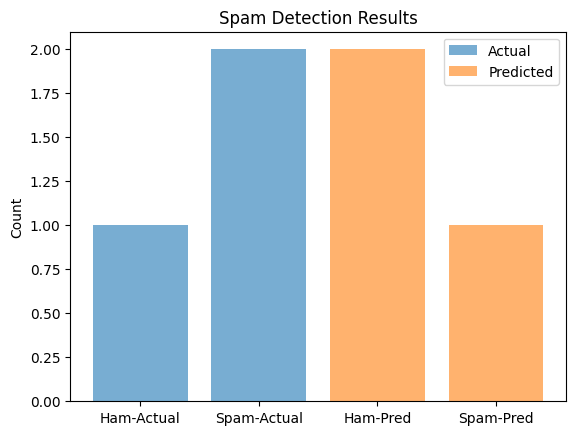

In [10]:

plt.bar(["Ham-Actual", "Spam-Actual"], [np.sum(y_test==0), np.sum(y_test==1)], alpha=0.6, label="Actual")
plt.bar(["Ham-Pred", "Spam-Pred"], [np.sum(y_pred==0), np.sum(y_pred==1)], alpha=0.6, label="Predicted")
plt.title("Spam Detection Results")
plt.ylabel("Count")
plt.legend()
plt.show()